In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import jupytertools
% matplotlib nbagg

### Initial considerations

We will assume that at each time step we move 1 "point" either up down left or right. Our random walk funnction will move from the current position in one of the four directions. 

In [2]:
def randomWalk(x,y):
    x_random = np.random.random()
    d = 1e-3
    if (x_random > 0.75):
        x = x + d
    elif (x_random < 0.75 and x_random > 0.5):
        x = x - d
    elif (x_random < 0.5 and x_random > 0.25):
        y = y + d
    else:
        y = y - d
        
    return x,y

### Animation

The cell below deals with animating the random walk in a useful way. This code is rather obfuscated sadly, but the comment's I've put in should help make it more understandable.

<IPython.core.display.Javascript object>


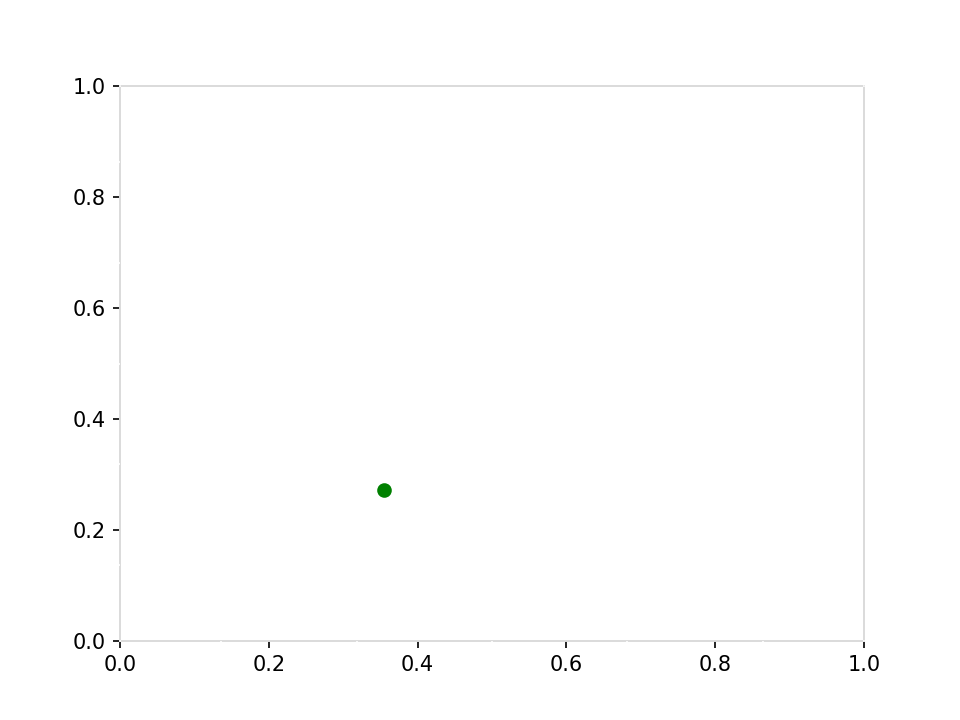

In [10]:
# Get the figure and axis objects from matplotlib.pyplot
fig, ax = plt.subplots()
jupytertools.plotting.darkFigure(fig)

# initialize two empty lists which we will use for our random walk
x = 0
y = 0

# create the line generator by making a plot of an empty space.
line, = plt.plot([], [], "go")

# create a function to do the animation.

def animate(i):
    # make the global variables visible to the function
    global x
    global y
    
    x,y = randomWalk(x,y)

    # set the data based on our random walk we generated above
    line.set_data([x],[y])  # update the data
    # return the "line generator" for handling the creation of each frame.
    return [line]

# Create the animation object which will do our animaiton.
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=True)

# Display the animation
plt.show()

<IPython.core.display.Javascript object>


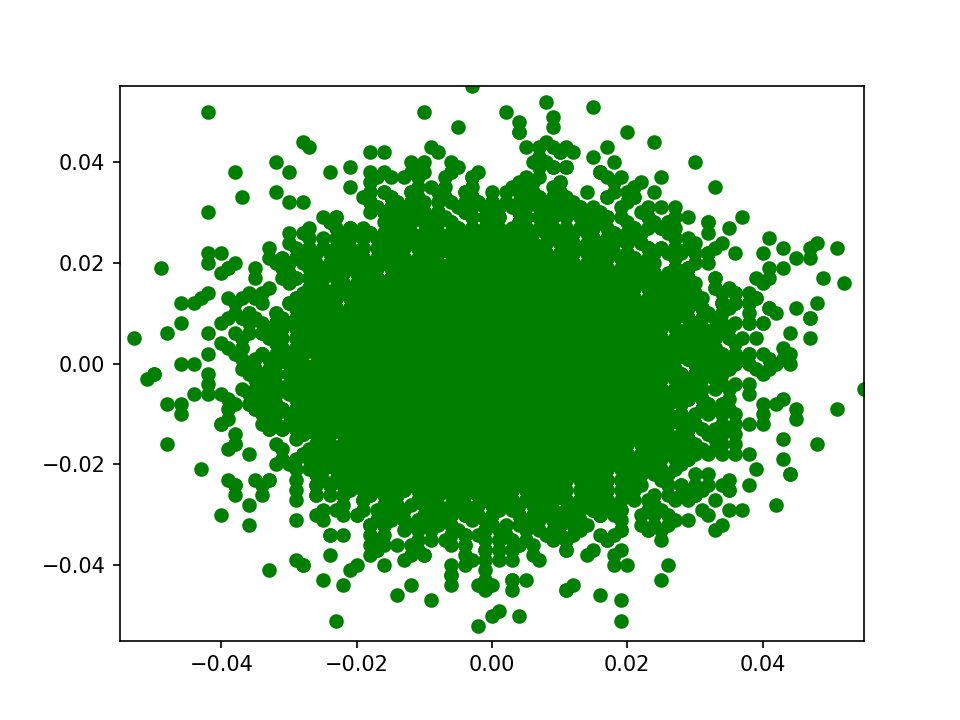

In [25]:
fig2 = plt.figure()

# Set the number of particles we want
N = int(1e4)

x_new = [0 for i in range(N)]
y_new = [0 for i in range(N)]

line, = plt.plot([], [], "go")

def newAnimate(i):
    # make the global variables visible to the function
    global x_new
    global y_new
    
    for j in range(N):
        xi,yi = randomWalk(x_new[j],y_new[j])
        x_new[j] = xi
        y_new[j] = yi
    
    # set the data based on our random walk we generated above
    line.set_data(x_new, y_new)  # update the data
    # return the "line generator" for handling the creation of each frame.
    return line,

# Create the animation object which will do our animaiton.
ani = animation.FuncAnimation(fig2, newAnimate, np.arange(1, 200), interval=25, blit=True)

# Display the animation
plt.show()
